In [41]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [42]:
import numpy as np
import eeghdf
import h5py
import sys
sys.path.append("./eeg-hdfstorage/notebooks/")
import stacklineplot

In [43]:
filename = "./eeg-hdfstorage/data/absence_epilepsy.eeghdf"

In [44]:
def load_eeg_file_h5py(filename):
	hdf = h5py.File(filename, "r")
	atributes = hdf["patient"].attrs
	rec = hdf["record-0"]
	signals = rec["signals"]
	return signals

In [45]:
def load_eeg_file_eeghdf(filename):
    file = eeghdf.Eeghdf(filename)
    return file.phys_signals
    

In [46]:
a = load_eeg_file_h5py(filename)[:, 10000:10000 + 1004]
b = load_eeg_file_eeghdf(filename)[:, 10000:10000 + 1004]

self._phys_offset: [-0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003  0.03589933  0.03589933  0.5       ]


In [47]:
print(a.shape)
print(b.shape)

(36, 1004)
(36, 1004)


In [52]:
num_channels = 10

In [53]:
labels = [str(i) for i in range(a.shape[0])]

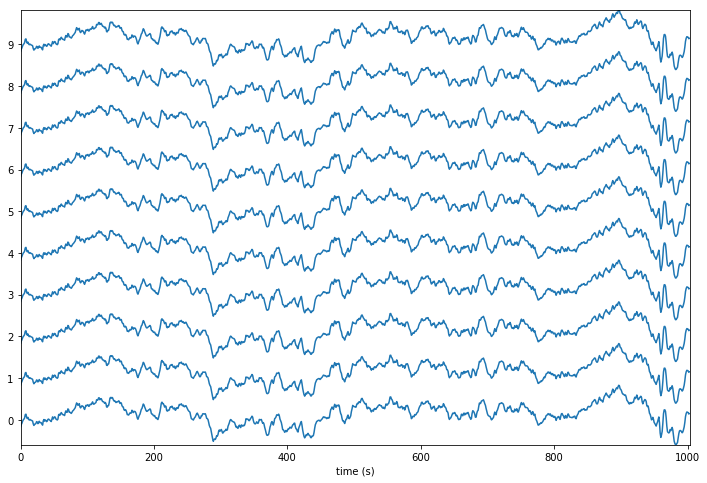

In [70]:
stacklineplot.stackplot(c[0][:num_channels], ylabels=labels[:num_channels], yscale=1)

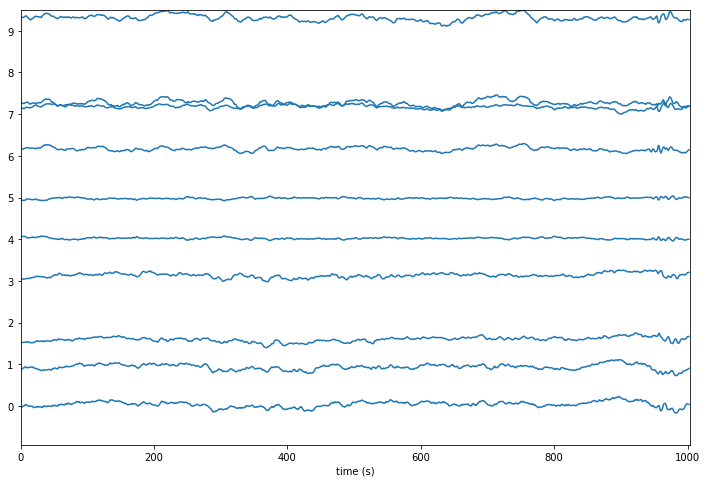

In [57]:
stacklineplot.stackplot(b[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [61]:
def save_EEG(data,num_channels, frequency, filename, channel_names=None):
	if data.shape[1] < 10000:
		np.save(filename, data[0, :, :])
	else:
		np.save(filename, data[0, :10000, :])

In [68]:
c = np.tile(a, 64).reshape(64, 36, 1004)

In [69]:
c.shape

(64, 36, 1004)

In [62]:
save_EEG(a, None, None, "viz_debug")

IndexError: too many indices for array